# Trabalho de Mineração de dados

### Carregando bibliotecas

In [ ]:
import pandas 
import numpy 
import matplotlib.pyplot as pyplot
import seaborn as sns

## Pré-processamento
### Carregando os dados

In [ ]:
train = pandas.read_csv("../input/porto-seguros-safe-driver-prediction-dataset/train.csv")
train.head()

### Análise exploratória

Os atributos possuem algumas características:
* os que possuem _bin_ são binários;
* os que possuem _cat_ são categóricas;
* alguns estão agrupados com _ind_, _reg_, _car_ e _calc_;
* algumas colunas podem conter o valor -1, indicando ausência de observação da característica;
* a coluna _target_ representa o acionamento ou não do seguro.



In [ ]:
'{} observações, {} características'.format(train.shape[0], train.shape[1])

![](http://)Como a coluna _target_ é a característica que mais tem representatividade nos nossos dados e por isso iremos análisar qual a distribuição dessa coluna.

In [ ]:
target_data = {'Sim': 0, 'Não': 0}

for o in train['target']:
    if o == 1:
        target_data['Sim'] += 1
    else:
        target_data['Não'] += 1

names = list(target_data.keys())
values = list(target_data.values())


fig, axs = pyplot.subplots()
axs.bar(names, values)
axs.set_xlabel('Seguro acionado')
axs.set_ylabel('Ocorrências')
pyplot.show()

Para facilitar o gerenciamento dos dados, visualização e análizes para fuura modelagem , abaixo iremos fazer alguns agrupamentos e visualizações :  

**Agrupamento por Tipos de atributos,funções, tipo de variável e preenchido  :**

Função: entrada, ID, destino

Tipo: nominal, intervalo, ordinário, binário

Preenchido : Verdadeiro ou Falso

Tipo de varíavel : int, float, str 

[definições](http://www.ernestoamaral.com/docs/dcp030d-101/var_reg.pdf)

In [ ]:
data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'entrada'
    elif f == 'id':
        role = 'id'
    else:
        role = 'destino'
         
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binario'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'intervalo'
    elif train[f].dtype == int:
        level = 'ordinario'
        
    # Inicializa as variáveis como verdadeiro para preenchidas e falsas para não preenchudas 
    Preenchido = True
    if f == 'id':
        Preenchido = False
    
    # Definindo o tipo do dadoa 
    dtype = train[f].dtype
    
    # Criando a Data type da vairável 
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'Preenchido': Preenchido,
        'Tipo': dtype
    }
    data.append(f_dict)
    
meta = pandas.DataFrame(data, columns=['varname', 'role', 'level', 'Preenchido', 'Tipo'])
meta.set_index('varname', inplace=True)
meta

Com a modelagem acima , podemos aplicar filtros , por exemplo , quero saber todos os dados que estão preenchidos 

In [ ]:
meta[(meta.level == 'nominal') & (meta.Preenchido)].index

No exemplo abaixo, segue estatísiticas dos tipos de variáveis, para análise da modelagem . 

In [ ]:
pandas.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

**Estatísticas  **

Baseando nas analises acima, podemos utilizar de bibliotecas do python que nos darão uma visão geral da nossa base, mas vale lembrar que não faz muito sentido calcular-mos a média ou gerarmos dados estatísticos em cima de variáveis do tipo categoricos ou identificadoras. 
Abaixo, geraramos dados estatísiticos por tipo de variável e uma análise das informações em cima das mesmas  . 



**Variáveis de intervalo**
  

In [ ]:
v = meta[(meta.level == 'intervalo') & (meta.Preenchido)].index
train[v].describe()

**Baseando nas estatiscicas acima, podemos conluir que :** 

**Variáreis do tipo Reg**
            So as variáveis do tipo ps_reg_03 possui valores ausentes
             o intervalo (min a max) difere entre as variáveis. Poderíamos aplicar o dimensionamento (por       exemplo, StandardScaler), mas isso depende do classificador que queremos usar.

**Variáveis do tipo  carro**
            ps_car_12 e ps_car_15 têm valores ausentes
            novamente, o intervalo é diferente e podemos aplicar a escala
            
**Variáveis ​​de cálculo**
             sem valores ausentes
             isso parece ser algum tipo de proporção, já que o máximo é 0,9
             todas as três variáveis ​​_calc têm distribuições muito semelhantes
             No geral, podemos ver que o intervalo das variáveis de intervalo é bastante pequeno

**Variáveis do tipo ordinaria**

In [ ]:
v = meta[(meta.level == 'ordinario') & (meta.Preenchido)].index
train[v].describe()

Somente temos dados incompletos da variável ps_car_11
Podemos aplicar escala para as diversas variáveis

**Variáveis do tipo logica **

In [ ]:
v = meta[(meta.level == 'binario') & (meta.Preenchido)].index
train[v].describe()

Apenas 3,65 dos dados não são fortemente balanceados 
A maioria das variáeis são 0

**Correlação dos tipos de variáveis **

**Variáveis do tipo intervalo**

In [ ]:
def corr_heatmap(v):
    correlations = train[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = pyplot.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    pyplot.show();
    
v = meta[(meta.level == 'intervalo') & (meta.Preenchido)].index
corr_heatmap(v)

* # Randon Forest

Foi desenvolvido um modelo para prever se o motorista irá utilizar ou não um seguro 

In [ ]:
import numpy as np 
import pandas as pd

from subprocess import check_output 
print(check_output(["ls", "../input"]).decode("utf8")) # Verificando uft para os dados 


Importando a base de dados pela biblioteca panda e verificando o conteúdo da mesma. (Apenas um visualização rápida, tendo em vista que já fizemos uma analise da base. )

In [ ]:
train = pd.read_csv("../input/porto-seguros-safe-driver-prediction-dataset/train.csv")
print(train.shape)
train.head()

-> O conjunto de dados de treinamento contém 595212 linhas e 59 colunas.<BR>
-> Target é a coluna que vamos prever.

Vamos analisar agora o dados de testes . 

In [ ]:
test = pd.read_csv("../input/porto-seguros-safe-driver-prediction-dataset/test.csv") 
#usando o panda para leitura da dataset
print(test.shape)
#vendo os headers do database 
test.head()

Para base de testes temos 58 colunas X 892816 
Temos a coluna target que temos que prever 

Verificando basicamnete os tipos de objetos 

In [ ]:
train.columns

Baseando-se na analise feita anteriormente da base, sabemos que os dados nao preenchidos estão como  -1 , sendo assim vamos troca-los para NA, para que possamos utilizar uma biblioteca do python para ajudar na analise .

In [ ]:
train_copy = train # copiando a base de treinamento 
train_copy = train_copy.replace(-1, np.NaN) # fazendo o replace 
test_copy = test # copiando a base de testes 
test_copy = test_copy.replace(-1, np.NaN)  #fazendo o replace 

Iremos agora analizar os graficos gerado pela ferramenta missingno , que pega todos os valor que estão como NAN e plota no gráfico. Assim poderemos tomar a decisão adequada para melhor prepararmos a base.  

In [ ]:
import missingno as msno
%matplotlib inline



Gráfico gerado com a base de treinamento, com os missing values 

In [ ]:
msno.bar(train_copy)

Gráfico para testes

In [ ]:
msno.bar(test_copy)

Iremos agora, gerar a base de verificação e treinamento para geração das florestas na fase de contrução do algoritmo . 

In [ ]:
X_train = train.drop(['target'], axis=1).values
y_train = train['target'].values


In [ ]:
# Para facilitar o processamento , iremos pegar as mais importantes características do nossa base utilizando a biblioteca abaixo 
#inportantdo ferramenta para geração de treinamento. 
#Como se trata de um ferramente open source o código está disponível 
# para o trabalho foi analizado o código fonte e abaixo está a explicação de cada item 
#impostando lib para o python 
from sklearn.model_selection import train_test_split
# apagando a coluna de predicação  para geração da base de dados 
X_train = train.drop(['target'], axis=1).values
#gerando uma matriz com esta coluna 
y_train = train['target'].values
# para geração do base de treinamento, usamos como parametro stratify a coluna com os dados de predicação para geração 
# da base de treinamento com toda a diverside, pois somente o parâmetro test_size , ele apenas divide a base, mas não 
#leva em consideração a diversidade da base 
X_train_main, X_train_validate, y_train_main, y_train_validate = train_test_split(X_train,y_train,test_size=0.5,stratify=y_train)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

forest = ExtraTreesClassifier(n_estimators=250) #quantas arvores na folha
forest.fit(X_train_main, y_train_main) # treinanando a floresta
# ******************* Explicação da função  ******************
# *****************  feature_importances_
#Os recursos usados ​​na parte superior da árvore contribuem para a decisão final de 
# previsão de uma fração maior das amostras de entrada . A fração esperada das amostras 
# para as quais elas contribuem pode ser usada como uma estimativa da importância relativa 
# das características.
# No scikit-learn, a fração de amostras para a qual um recurso contribui é combinada 
# com a diminuição da impureza ao separá-los para criar uma estimativa normalizada do 
# poder preditivo desse recurso.
#Abaixo segue a equação de diminuição da impureza ponderada bseando-se no código da biblioteca :
# Feature of importance of feature X_i 
# = Sum of the following value for all nodes, in which X_i is the splitting features
#            N_t / N *impurity - N_t_R / N_t * right_impurity
#                   - N_t_L / N_t * left_impurity
#onde Né o número total de amostras, N_té o número de amostras no nó atual, 
# N_t_Lé o número de amostras no filho esquerdo e N_t_Ré o número de amostras no filho 
# direito. N, N_t, N_t_RE N_t_Ltodos se referem à soma ponderada, se sample_weighté passado.
# Para um conjunto de árvores, a importância do recurso de todas as árvores é calculada 
# como média para obter a importância do recurso geral do modelo.
importances = forest.feature_importances_


#ordenando os indices das colunas de forma decrescente 
indices = np.argsort(importances)[::-1]


print("Caracteristicas  mais importantes :")

for f in range(X_train_main.shape[1]):
    print("%d. Caracteristicas %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
print(forest.estimators_)
    
#tirando o desvio médio de cada feature mais importante e sua arvore     
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
    
    
# Plotando o desvio medio de cada feature maais importante e sua arvore 
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X_train_main.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_main.shape[1]), indices)
plt.xlim([-1, X_train_main.shape[1]])
plt.show()



Analisando os gráficos acima, percebemos que apenas 28 são mais importantes para previsão, devido a isso vamos usar apenas os 28 mais importantes 

In [ ]:
importante = []
for f in range(28):
    importante.append(indices[f])
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
print(importante)

Agora vamos filtrar só os dados impostantes e colocar no dataset

In [ ]:
# DataFrame só com os dadso importantes 
#mesmo processo realizado acima , tira a coluna de preditores
trein_copy = train.drop(['target'],axis=1)
#filttra só os dados importantes , os top 28
final_train = trein_copy.iloc[:,importante]
#final_train = trein_copy
#associa os dados de treinamento 
X_train = final_train.values
y_train = train['target'].values
#utilziando a funçaõ do python para separar os dados de treinamento e teste, 80 % treinamento e 20% teste 
#bem util , pois pega uma mostra do código
X_train_main, X_train_validate, y_train_main, y_train_validate = train_test_split(X_train,y_train,test_size=0.2,stratify=y_train)

Depois de toda a análise vamos jugar no randomflorest e verificarmos os resultados 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=100)
clf.fit(X_train_main, y_train_main)
predicted_train_validate = clf.predict(X_train_validate)
actual_train_validate = y_train_validate

vamos verificar a acuracia nula , primeira analisar a nossa base  vamos ver quantos intens que acionaram o seguro e quantos não acionaram o seguro  para isso usamos o pandas a função count 

Com estes dados , vamos calcular a acauracia nula do nosso termo para podermos 

In [ ]:
y_test=pd.Series(y_train_validate)
y_test.value_counts() 



com isso chegar a ter 114704 itens acionaram o seguro e 4339 usuários acionaram o seguro . Agora vamos calcular a acuracia nula , ou seja se meu modelo pedricasse a classe dominante 100 vamos ver como ficaria a acuracia nula 

In [ ]:
print(114704/(114704+4339))

Com isso temos que a acuracia nula é de 96% ouseja em outras palavras o modelo puro que sempre prediz que o usuário não ira usar o seguro estaria correto 96% . Isto demonstra uma fraqueza da acuracia , pois 96% das pessoas não usam o seguro . 
A acuracio ele é extremanamente interessante e simples, mas nos não sabemos o acontece atraz das cortinas ou seja , quantas destas classes foram acertadas de maneira correta e quantas não foram, então para tentarmos melhorar vamos fazer a matriz de confusão 

Agora vamos calular a acuraria nula para a base de teste  

In [ ]:
y_test=pd.Series(y_train_main)
y_test.value_counts() 


In [ ]:
print(458814/(458814+17355))

vamos agora prever com o biblioteca do sklearn metrics, nela você teria a acuracia média . 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(actual_train_validate, predicted_train_validate)

A acuracia é bom para preditar , mas temos temos só uma visão geral do acerto e errado . por exemplo abaixo temos alguns exemplos que deram errado. 

In [ ]:
print(actual_train_validate[:100])
print(predicted_train_validate[:100])


Devido a péssima predição para pessoas com sinistros , aumentaremos o n~umeros de arvores e floresta para verificarmos se conseguimos melhoras 

Tivemos problemas aonde , aonde éra para ter ocorrido o erro, nunca seria analisada usando a acuracia, mas tal prolema podemos usar a matriz de confusão . 
Resumindo , a acuracia ela é bem útil, mas infelismente ela não nos dis aonde esta ocorrendo o erro. 

**Matriz de confusão** , nada mais que um quadro ou uma tabela que nos descreve o que esta acontecendo, a sua performance. Ela esta disponivel no modulo metrix segue abaixo um exemplo dela.  

In [ ]:
import sklearn.metrics as metrics
metrics.confusion_matrix(actual_train_validate,predicted_train_validate)

Esta mariz, não esta rotulado com nenhum texto, logo abaixo irei explicar melhor estes valores, para depois explicar o que vamos aprender deste modelo.
*dica: todos os modulos do skylearn, é aconselhado passar primento os valores de teste 
    e por ultimo os predicados, senão vai gerar uma matriz invertida. 
    

Primeiramente temos que ter em mente que a matriz será 2X2, pois nosso problema é binário , conforme desenho abaixo :  (Caso existisse 6 posíveis respostas, a amtriz seria 6X6 )
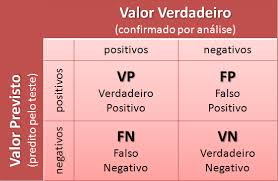

Antes de continuar-mos, vamos definir algumas termologias : 
*    0 -> negativo 
*    1 -> positivo 
> **Terminologia :** 
*       Verdadeiro positivo :  São predições corretas, o segurado acionou o seguro 
*       Verdadeiro negativo :  São predições corretas, o segurado não acionou o seguro 
*       Falso positivo : São predições incorretas , que o segurado acionou o seguro 
*       Falso negativo : São predições incorretas, que o segurado não acionou o seguro 


Para analisarmos melhor a matriz de confusão, vamos pegar os valores gerados e colocar na labels para ficar mais 

In [ ]:
conf = metrics.confusion_matrix(actual_train_validate, predicted_train_validate)
VP = conf[1,1]
VN = conf[0,0]
FP = conf[0,1]
FN = conf[1,0]



Com a matriz de confunsão , podemos calcular a acuracia , que já foi calculada pelo metrix anterior-mente mas aqui conseguimos verificar o codigo que ela executa por traz 


In [ ]:


print((VP+VN)/(VP+VN+FP+FN))
accuracy_score(actual_train_validate, predicted_train_validate)

Agora vamos calcular algumas metricas para verificarmos melhor os resultados  

**Sensibilidade :** Qaundo um valor real é positivo, quão frenquente as predições estão corretas ? No nosso problema, é quando eu falei que o segurado ia acionar o seguro e ele realmente acionou   
Abaixo segue o calculo da sensibilidade e chamada da função recall_score , que faz o calculo da sensibilidade pelo skylearn 



In [ ]:
print((VP)/(VP+FN))
print(metrics.recall_score(actual_train_validate,predicted_train_validate))

Especialiade: Quando o valor real é negativo, qual frequencia as predições estão corretas ? ( no nosso modelo, siguinifica quantas x eu falei que o segurado não ia acionar o seguro e acabou acionando )Abaixo segue o calculo da sensibilidade e chamada da função recall_score , que faz o calculo da sensibilidade pelo skylearn 

In [ ]:
print(FP/(FP+FN))

Visão geral da matriz de confusão  
* Nos mostra uma visão geral do classificador
* Nos gera varias metricas para calculo da classificação 

Agora com todo o enbasamento teorico,faremos exprimentos para verificar se conseguimos melhor a sensibilidade do nosso trabalho

tamanho máximo da arvore = 30 arvores na floresta = 150 

In [ ]:
clf2 = RandomForestClassifier(max_depth=30, n_estimators=200)
clf2.fit(X_train_main, y_train_main)
predicted_train_validate2 = clf.predict(X_train_validate)
actual_train_validate2 = y_train_validate

conf2 = metrics.confusion_matrix(actual_train_validate2, predicted_train_validate2)
VP2 = conf2[1,1]
VN2 = conf2[0,0]
FP2 = conf2[0,1]
FN2 = conf2[1,0]
print('*** Resultados *****')

print ('**** Acuracia ***')
print((VP2+VN2)/(VP2+VN2+FP2+FN2))
accuracy_score(actual_train_validate2, predicted_train_validate2)

print ('**** Sensibilidade ***')
print((VP2)/(VP2+FN2))
print(metrics.recall_score(actual_train_validate2,predicted_train_validate2))

print('***** Especialidade *****' )
print(FP2/(FP2+FN2))


tamanho máximo da arvore = 30 arvores na floresta = 200 

In [ ]:
clf2 = RandomForestClassifier(max_depth=30, n_estimators=200)
clf2.fit(X_train_main, y_train_main)
predicted_train_validate2 = clf.predict(X_train_validate)
actual_train_validate2 = y_train_validate

conf2 = metrics.confusion_matrix(actual_train_validate2, predicted_train_validate2)
VP2 = conf2[1,1]
VN2 = conf2[0,0]
FP2 = conf2[0,1]
FN2 = conf2[1,0]
print('*** Resultados *****')

print ('**** Acuracia ***')
print((VP2+VN2)/(VP2+VN2+FP2+FN2))
accuracy_score(actual_train_validate2, predicted_train_validate2)

print ('**** Sensibilidade ***')
print((VP2)/(VP2+FN2))
print(metrics.recall_score(actual_train_validate2,predicted_train_validate2))

print('***** Especialidade *****' )
print(FP2/(FP2+FN2))


tamanho máximo da arvore = 40 arvores na floresta = 250 

In [ ]:
clf2 = RandomForestClassifier(max_depth=40, n_estimators=250)
clf2.fit(X_train_main, y_train_main)
predicted_train_validate2 = clf.predict(X_train_validate)
actual_train_validate2 = y_train_validate

conf2 = metrics.confusion_matrix(actual_train_validate2, predicted_train_validate2)
VP2 = conf2[1,1]
VN2 = conf2[0,0]
FP2 = conf2[0,1]
FN2 = conf2[1,0]
print('*** Resultados *****')

print ('**** Acuracia ***')
print((VP2+VN2)/(VP2+VN2+FP2+FN2))
accuracy_score(actual_train_validate2, predicted_train_validate2)

print ('**** Sensibilidade ***')
print((VP2)/(VP2+FN2))
print(metrics.recall_score(actual_train_validate2,predicted_train_validate2))

print('***** Especialidade *****' )
print(FP2/(FP2+FN2))

tamanho máximo da arvore = 50 arvores na floresta = 300 

In [ ]:
clf2 = RandomForestClassifier(max_depth=50, n_estimators=300)
clf2.fit(X_train_main, y_train_main)
predicted_train_validate2 = clf.predict(X_train_validate)
actual_train_validate2 = y_train_validate

conf2 = metrics.confusion_matrix(actual_train_validate2, predicted_train_validate2)
VP2 = conf2[1,1]
VN2 = conf2[0,0]
FP2 = conf2[0,1]
FN2 = conf2[1,0]
print('*** Resultados *****')

print ('**** Acuracia ***')
print((VP2+VN2)/(VP2+VN2+FP2+FN2))
accuracy_score(actual_train_validate2, predicted_train_validate2)

print ('**** Sensibilidade ***')
print((VP2)/(VP2+FN2))
print(metrics.recall_score(actual_train_validate2,predicted_train_validate2))

print('***** Especialidade *****' )
print(FP2/(FP2+FN2))

* # Decision Tree 

Abaixo segue o código implementado e comentado sobre a arvore de decisão  da arvore de decisão. toda a teoria sobre acuracia, matriz de confusão já foi implementada acima não será explicada novamente nesta implementação . 

In [ ]:

from random import seed
from random import randrange

import pandas 

import numpy as np
from joblib import Memory


from random import seed
from random import randrange
from csv import reader
from sklearn.model_selection import train_test_split

# Converte todos os valores para numérico 
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column])

# Splita o data set 
def Split_Train_testDataSet(dataset):
	X_train_main, y_train_main = train_test_split(dataset,test_size=0.5)
	return X_train_main, y_train_main

  
# Calcula o porcentual de acuracia 
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# roda o algoritomo definido pela arvore 
def evaluate_algorithm(dataset, algorithm, n_folds,max_depth, min_size,*args):
    X_train_main, teste = Split_Train_testDataSet(dataset)
    predicted = algorithm(X_train_main, teste,max_depth,min_size, *args)
    return predicted

# split no data sat 
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right

# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# conto quantas instancia tem no grupo
	n_instances = float(sum([len(group) for group in groups]))
	# somo o indici guini de cada instancia 
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# verifique se é 0 para não ter erro ao dividir
		if size == 0:
			continue
		score = 0.0
		# somo os indices para cada classe
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# adiciono o peso do score para cada grupo
		gini += (1.0 - score) * (size / n_instances)
	return gini

# SSeleciono o melhor inidice 
def get_split(dataset):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	contadora = 1 
	contadorb=2
	
	for index in range(len(dataset[0])-1):
		contadora= 1 + contadora 
		
		for row in dataset:
			contadorb= contadorb +1
			if((contadorb%200)==0):
			   print(contadorb)
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}

# crio o no  
def to_terminal(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)

# crio o no filho ou marco ele como raiz
def split(node, max_depth, min_size, depth):
	left, right = node['groups']
	del(node['groups'])
	# verifico se deve ser esplidado
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	# Verifico o tamanho maximo
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
	# verifico o tamanho minimo
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_split(left)
		split(node['left'], max_depth, min_size, depth+1)
	# processo o filho
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_split(right)
		split(node['right'], max_depth, min_size, depth+1)

# construo a arvore
def build_tree(train, max_depth, min_size):
	root = get_split(train)
	split(root, max_depth, min_size, 1)
	return root

# Make a prediction with a decision tree
def predict(node, row):
	if row[node['index']] < node['value']:
		if isinstance(node['left'], dict):
			return predict(node['left'], row)
		else:
			return node['left']
	else:
		if isinstance(node['right'], dict):
			return predict(node['right'], row)
		else:
			return node['right']

# Monto a arvore 
def decision_tree(x_train, X_teste,max_depth,min_size):
    tree = build_tree(x_train, max_depth, min_size)
    predictions = list()
    lstResult= list() 
    for row in X_teste:
        x = row
        teste = np.delete(x, [57,57]) 
        prediction = predict(tree,teste)
        contador=contador+1
        predictions.append(prediction)
        lstResult.append(row[57])
    return(accuracy_metric(predictions,lstResult))

# load and prepare data
#filename = 'train.csv'
filename = 'train.csv'
dataset = pandas.read_csv(filename)
dataset = dataset[0:50]
X_train1 = dataset.drop(['target'], axis=1).values
y_train1 = dataset['target'].values
teste = np.insert(X_train1,58,y_train1,  axis=1)
#print(teste[0])


# evaluate algorithm
n_folds = 5
max_depth = 30
min_size = 7
test1 = teste 
for i in range(len(test1[0])):
	str_column_to_float(test1, i)

teste1 = evaluate_algorithm(test1, decision_tree, n_folds, max_depth, min_size)


print('Mean Accuracy: %.3f%%' %teste1 )



* # MLP

In [ ]:
import numpy as np


# Classe da camada mlp
class Camada:
    def __init__(self, n_entradas, n_neuronios, tipo_funcao_ativacao=None, pesos=None, bias=None):
        self.n_neuronios = n_neuronios
        self.tipo_funcao_ativacao = tipo_funcao_ativacao
        self.pesos = pesos if pesos is not None else np.random.rand( n_entradas,n_neuronios) 
        self.tipo_funcao_ativacao = tipo_funcao_ativacao
        self.bias = bias if bias is not None else np.random.rand(n_neuronios) 

    def funcao_soma(self, x):
        r = np.dot(x, self.pesos) + self.bias
        self.valor_ultima_funcao_ativacao = self.funcao_ativacao(r)
        return self.valor_ultima_funcao_ativacao

    def funcao_ativacao(self, r):
       
        if self.tipo_funcao_ativacao is None:
            return r

        # tanh
        if self.tipo_funcao_ativacao == 'tanh':
            return np.tanh(r)

        # sigmoid
        if self.tipo_funcao_ativacao == 'sigmoid':
            return 1 / (1 + np.exp(-r))

        # softmax
        if self.tipo_funcao_ativacao == 'softmax':
            r -= r.max() # avoiding overflow
            r_exp = np.exp(r)
            r_row_sum = r_exp.sum(1)
            a = r_exp / r_row_sum.reshape((-1,1))
            return a
        
        return r


    def funcao_ativacao_derivada(self, r):
      
        if self.tipo_funcao_ativacao is None:
            return r

        # tangente hiperbolica
        if self.tipo_funcao_ativacao == 'tanh':
            return 1 - r ** 2

        # sigmoide
        if self.tipo_funcao_ativacao == 'sigmoid':
            return r * (1 - r)

        

        return r


class CamadaRecorrente(Camada):

    def __init__(self, n_entradas, n_neuronios, tipo_funcao_ativacao=None, pesos=None, bias=None, atraso=False):
        super().__init__(n_entradas, n_neuronios, tipo_funcao_ativacao, pesos, bias)
        self.camada_recorrente = Camada(1, n_neuronios, tipo_funcao_ativacao, pesos, bias)
        self.valor_recorrente = []
        self.atraso = atraso
        
    def funcao_soma(self, x, treinamento=False):
        if treinamento:
            if self.valor_recorrente == []:
                self.valor_recorrente = np.zeros([len(x), self.n_neuronios])
            else:
                self.valor_recorrente = np.copy(self.valor_ultima_funcao_ativacao)
               

            r = np.dot(x, self.pesos) + self.bias
            if self.atraso:
                # Recorrencia
                saida_ant = np.dot(self.valor_recorrente, self.camada_recorrente.pesos.T)
                
                r = r + saida_ant

            # Valor final
            self.valor_ultima_funcao_ativacao = self.funcao_ativacao(r)
            self.valor_recorrente = self.valor_ultima_funcao_ativacao
            return self.valor_ultima_funcao_ativacao
        else:
            r = np.dot(x, self.pesos) + self.bias
            self.valor_ultima_funcao_ativacao = self.funcao_ativacao(r)
            return self.funcao_ativacao(r)

In [ ]:
import pandas as pd
sample_submission = pd.read_csv("../input/porto-seguros-safe-driver-prediction-dataset/sample_submission.csv")
test = pd.read_csv("../input/porto-seguros-safe-driver-prediction-dataset/test.csv")
train = pd.read_csv("../input/porto-seguros-safe-driver-prediction-dataset/train.csv")

In [ ]:
import pandas as pd
sample_submission = pd.read_csv("../input/porto-seguros-safe-driver-prediction-dataset/sample_submission.csv")
test = pd.read_csv("../input/porto-seguros-safe-driver-prediction-dataset/test.csv")
train = pd.read_csv("../input/porto-seguros-safe-driver-prediction-dataset/train.csv")